## PROBLEM STATEMENT

- Providing an implementation of logistic regression (binary classification algorithm) with a given scenario:

### SCENARIO:
Suppose that selection for a field trip that a school is organizing is based on each applicant's last two exam results. We are the selection committee, and we want to determine each applicant’s chance of being selected based on their results on two exams. 
* Let's say we have historical data from previous applicants that is used as a training set for logistic regression. 
* For each training example, we have the applicant’s scores on two exams (two features) and the admissions decision (associated output label).


#### Let's build a classification model that estimates an applicant’s probability of selection for the field-trip based on the scores from those two exams. 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math
from utils import *

In [22]:
# load dataset function is defined in utils.py
# load the training data. 
# X_train is a 2D array, y_train is a 1D array.
X_train, y_train = load_data("data/data.txt")

### VISUALIZE THE INITIAL TRAINING SET:

- I'll plot the given training data on a set of axes (where the axes are the two features-->(two exam marks)) to provide visualization of what we're dealing with.
    - We'll denote the ``positive class`` as being selected for the field trip.
    - We'll denote the ``negative class`` as not being selected for the field trip.




The function to generate this plot is written in the ``utils.py`` file for organization purposes, we'll simply call it here :)

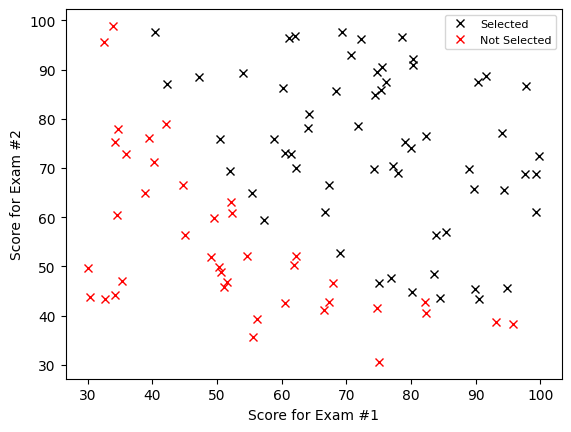

In [23]:
plot_data(X_train, y_train, positive_class_label="Selected", negative_class_label="Not Selected")

plt.xlabel("Score for Exam #1")
plt.ylabel("Score for Exam #2")
plt.legend(prop={'size': 8}, loc="upper right")
plt.show()

### SIGMOID FUNCTION -- ITS IMPORTANCE:

- For Logistic Regression, our given model is represented as a the function:
$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
- where the function $g$ is the sigmoid function defined as:

$$g(z) = \frac{1}{1+e^{-z}} \,\,\,\, equivalent\,\, to: \,\,\, g(z) = \frac{1}{1+e^{-\mathbf{w}\cdot \mathbf{x} + b}} $$ 

- This function allows us to predict the probability of a binary variable. The unique characteristic of the sigmoid function is that its range is: $[0,1]$, which is perfect for our purposes, as the probability of an event is always between 0 and 1.

``IMPORTANT NOTES``: 

- The sigmoid function is also differentiable, which is important for our optimization algorithm (gradient descent) to work.
- The parameter $z$ can be an array of numbers, in which case, we'd apply the sigmoid function to each element of the array.
- For more information on the variables ``w`` and ``b``, please refer to external information regarding the weights and bias of a logistic regression model.


In [24]:
# defining the sigmoid function
def sigmoid(z):

    # compute the sigmoid of z.
    g = 1 / (1 + np.exp(-z))

    return g

### COST FUNCTION -- ITS IMPORTANCE:

#### Quick Overview of the Cost Function:
- The cost function is used to measure the performance of our model. It is a function that takes in the predicted output and the actual output and returns a single number that represents the error of the model.
- Our goal is to minimize the cost to get the most accurate predictions, which is why we use the cost function to optimize our model.

#### Cost Function for Logistic Regression:
For logistic regression, the cost function is

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where,
* m is the number of training examples in the dataset.
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is - 

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, equivalent to $g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$, where $g$ is the sigmoid function.
* $y^{(i)}$ is the actual label for the $i^{th}$ data point.

Let's test the cost function upon implementation with some random values for the weights and bias, so that we can get an idea of how it works!
    

In [25]:
# defining the cost function.
def compute_logistic_cost(X, y, w, b):

    # creating a variable to store the 'm' training examples, and cost.
    m = X.shape[0]
    cost = 0

    # compute the cost.
    for i in range(m):

        # compute the sigmoid of the dot product of the weights and the training example, plus the bias.
        z_i = np.dot(w, X[i]) + b
        f_wb_i = sigmoid(z_i)

        cost += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)
    
    cost /= m
    return cost

m, n = X_train.shape
# compute and display the cost with 'w' & 'b' initialized to zeroes for simplicity.
w_init = np.zeros(n)
b_init = 0.0
cost = compute_logistic_cost(X_train, y_train, w_init, b_init)

### GRADIENT'S OF LOGISTIC REGRESSION -- THEIR IMPORTANCE:

#### Quick Overview of the Gradient:
- As mentioned earlier, the optimization algorithm we'll be using is gradient descent, and in order to implement it we need ``gradients``

    * The gradient is simply the rate of change of the cost function with respect to the parameters of the model ``w`` and ``b``. Definitely require some Calculus knowledge to understand this, but it's not too difficult to grasp.
    
Recall our cost function for logistic regression: $$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

#### Gradient of the Cost Function:
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{2} ----> gradient \,\, of \,\, the \,\, cost \,\, function \,\, w.r.t \,\, the \,\, weights.
$$

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{3}
----> gradient \,\, of \,\, the \,\, cost \,\, function \,\, w.r.t \,\, the \,\, bias.
$$

- Want to note that the gradient for $\frac{dJ}{dw}$ is a vector of partial derivatives of the cost function with respect to each $w_{j}$ in the model. 
    - $\frac{dJ}{dw}$ It will consist of $n$ elements, where $n$ is the number of features in the model.
- $\frac{dJ}{db}$ is a scalar value, indicating the bias.

Let's test the gradient calculations upon implementation with some random values for the weights and bias, so that we can get an idea of how it works!

In [26]:
# defining the gradient function.
def compute_gradient(X, y, w, b):

    # store the number of training examples 'm' and the number of features 'n'.
    m, n = X.shape

    # create variables to store the gradient of the cost function with respect to the weights and bias.
    dj_dw = np.zeros(w.shape)
    dj_db = 0.0

    # compute the gradient.
    for i in range(m):

        # compute the sigmoid output.
        f_wb_i = sigmoid(np.dot(X[i], w) + b)

        # compute the error.
        err_i = f_wb_i - y[i]

        for j in range(n):

            # compute the gradient of the cost function with respect to the weights.
            dj_dw[j] += err_i * X[i][j]

        # compute the gradient of the cost function with respect to the bias.
        dj_db += f_wb_i - y[i]                                            
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

# compute and display the gradient with 'w' & 'b' initialized to zeroes for simplicity.
w_init = np.zeros(n)
b_init = 0.0
dj_dw, dj_db = compute_gradient(X_train, y_train, w_init, b_init)

### IMPLEMENTATION OF GRADIENT DESCENT:

The gradient descent algorithm is used to optimize the parameters ``w`` and ``b`` of the model, in order to minimize the cost function.
- The algorithm is as follows:
    - Initialize the parameters of the model (weights and bias).
    - Calculate the gradient of the cost function with respect to the parameters.
    - Update the parameters simultaneously using the gradient descent update rule.
    - Repeat the process until convergence.

#### Algorithm:
$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j= 0...n-1}\newline & \rbrace\end{align*}$$

where,
* $\alpha$ is the learning rate of the algorithm.
* $n$ is the number of features in the model.




In [27]:
# defining the gradient descent function.
def gradient_descent(X, y, w_init, b_init, compute_logistic_cost, compute_gradient, alpha, num_iters):

    # store the number of training examples 'm' and the number of features 'n'.
    m, n = X.shape

    # creating a list to store how the cost changes for visualization.
    cost_history = []

    # perform gradient descent.
    for i in range(num_iters):


        dj_dw, dj_db = compute_gradient(X, y, w_init, b_init)

        w_init = w_init - (alpha * dj_dw)
        b_init = b_init - (alpha * dj_db)

        # Save cost at each iteration for printing later.
        if i < 100000: 
            curr_cost =  compute_logistic_cost(X, y, w_init, b_init)
            cost_history.append(curr_cost)

        # print the cost every at intervals 10 times.
        if i % math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            print(f"Iteration {i:4}:     Cost: {float(cost_history[-1]):8.2f}")
    
    return w_init, b_init, cost_history

### LEARNING OUR ACTUAL PARAMETERS:

- Now that we have the cost function and the gradient descent algorithm, we can use them to learn the parameters of our model.
- We'll define an appropriate $\alpha$ and the number of iterations for the algorithm to run.

In [28]:
# perform gradient descent algorithm to learn our parameters' values:

# define a starting point for the algorithm with 'w' & 'b' 
w_init = np.zeros(n)
b_init = -30.0

# gradient descent settings
iterations = 10000
alpha = 0.001

w, b, cost_history = gradient_descent(X_train, y_train, w_init, b_init, compute_logistic_cost, compute_gradient, alpha, iterations)
print("The optimized values for the weights are: ", w)
print("The optimized value for the bias is: ", b)

Iteration    0:     Cost:    14.02
Iteration 1000:     Cost:     0.21
Iteration 2000:     Cost:     0.21
Iteration 3000:     Cost:     0.21
Iteration 4000:     Cost:     0.21
Iteration 5000:     Cost:     0.21
Iteration 6000:     Cost:     0.21
Iteration 7000:     Cost:     0.21
Iteration 8000:     Cost:     0.21
Iteration 9000:     Cost:     0.21
Iteration 9999:     Cost:     0.21
The optimized values for the weights are:  [0.2448592  0.24046504]
The optimized value for the bias is:  -29.985228614555304


### VISUALIZING THE DECISION BOUNDARY:

- From the learned parameters, we can plot the decision boundary of the model.
    - The decision boundary is the line that separates the two classes in the dataset. Which ultimately creates a seperation between being selected for the field trip or not.

The plotting function is defined in ``utils.py``. We'll simply call it with the learned parameters and the dataset to visualize the decision boundary.

#### The blue line is the decision boundary, and the red (negative class) and black (positive class) crosses are the training examples.



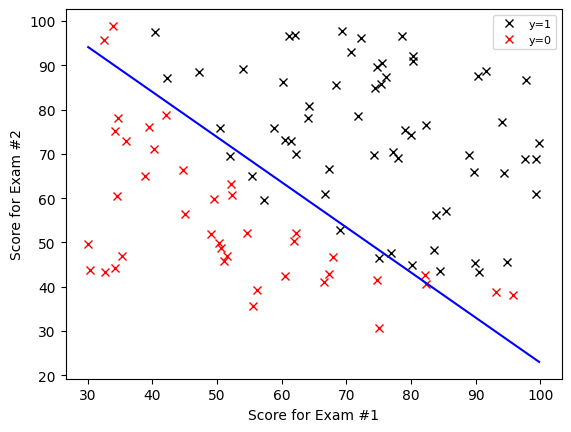

In [29]:
# plot the decision boundary.
plot_decision_boundary(X_train, y_train, w, b)

# set plot labels.
plt.xlabel("Score for Exam #1")
plt.ylabel("Score for Exam #2")

# set plot legend.
plt.legend(prop={'size': 8}, loc="upper right")
plt.show()

### MAKING PREDICTIONS:

- Now that we have the learned parameters, we can use them to make predictions on new data points.
- To find the quality of the parameters we've learned, we'll calculate the accuracy of the model on our initial training sets ``X_train`` and ``y_train``.

  * Therefore, to get a final prediction ($y^{(i)}=0$ or $y^{(i)}=1$) from the logistic regression model, the following blueprint is useful -

    * if $f(x^{(i)}) >= 0.5$, predict $y^{(i)}=1$
  
    * if $f(x^{(i)}) < 0.5$, predict $y^{(i)}=0$

In [30]:
# creating the predict function.
def predict(X, w, b):

    # store the number of training examples 'm' and the number of features 'n'.
    m, n = X.shape
    y_pred = np.zeros(m)

    # loop through the training examples.
    for i in range(m):

        z_wb_i = 0

        #  loop through the features.
        for j in range(n):
            
            # compute the dot product with the learned parameters.
            z_wb_i += X[i][j] * w[j]
        
        # check if the prediction is positive or negative.
        z_wb_i += b
        f_wb = sigmoid(z_wb_i)
        y_pred[i] = 1 if f_wb >= 0.5 else 0
    
    return y_pred

# compute the accuracy of the model on the training set.
prediction = predict(X_train, w, b)
print('Trainining Accuracy: %f'%(np.mean(prediction == y_train) * 100),'%')

Trainining Accuracy: 90.000000 %
